# 4x4 grid of graphs comparing actual depth errors and fractal roughness measures

HSGH case

**Chris Field April 2022**

In [1]:
import os  # operating system
import sys # to add src directory for my modules
#
import numpy as np
import math
import random
#
import pandas as pd
from scipy import stats
#
# Plotting requirements
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors
import matplotlib.font_manager # different fonts
from matplotlib import rcParams # runtime config to set fonts

In [2]:
# Using rcParams set the global fonts for Matplotlib
# Global parameters for Matplotlib: set font etc.
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Gill Sans MT']
rcParams['font.serif'] = ['Garamond']
rcParams['font.size'] = '16'
#

## Define Functions

In [3]:
# Shared variables:
colours = ['#1f77b4', '#ED1D24', '#1CEDAB', '#AC5678', '#896E2E', '#EDDD11', '#05ED42']

# Input Data

In [4]:
location_in = './Input_4/'

location_out='./Output_4/'

location_out_plots='./Pictures/Horizon_analysis_plots/'

# If necessary make output folders
    
if not os.path.exists(location_out_plots) :
    os.makedirs(location_out_plots)

# Load in and prepare data
* Note currently this data is stitched together by hand, should automate its creation.

In [5]:
# Read csv nDI format TBZ (event) ascii
df_input=pd.read_excel(location_in + 'Original_Seismic_PSD_and_fractal_dimension_analysis_with_fieldstats.xlsx')
# Remove quote marks from column names
df_input.columns=df_input.columns.str.replace('\"','')
# Some column names have trailing white space, remove this
df_input.columns=df_input.columns.str.replace('\s+','_')

In [6]:
# Remove NIMR field
df_input = df_input[df_input['FIELD_NAME'] != 'TIBR']

In [7]:
# sort in reverse order of fractal dimention
df_input.sort_values(by='FIELD_NAME', ascending=True)

,Name,PSD_slope,Dpsd,SV_slope,SV_intercept,Dsv,M_slope,M_intercept,Dm,FIELD_NAME,...,DEPTH_STANDARD_DEVIATION_(M),NUMBER_OUT_OF_PROGNOSIS,%_OUT_OF_PROGNOSIS,AVERAGE_ERROR_(M),ERROR_STANDARD_DEVIATION_(M),ERROR_SKEW,ERROR_KURTOSIS,NUMBER_OF_LEGACY_WELLS,MEDIAN_CLOSEST_WELL_SEPARATION_AT_STRAT_(M),ABS_ERROR
0,df_anzauz_X,-1.83,1.58,1.87,-0.71,1.07,1.00,-0.84,1.00,ANZAUZ,...,71.42,2,20.0,-12.69,45.95,-2.98,9.18,54,378,12.69
1,df_anzauz_Y,-1.89,1.56,1.52,0.18,1.24,1.00,-0.47,1.00,ANZAUZ,...,71.42,2,20.0,-12.69,45.95,-2.98,9.18,54,378,12.69
2,df_bahja_X,-1.86,1.57,1.66,-1.00,1.17,1.00,-0.92,1.00,BAHJA,...,33.36,5,20.8,-4.88,33.01,-4.66,22.48,102,342,4.88
3,df_bahja_Y,-1.85,1.57,1.52,-0.43,1.24,0.99,-0.77,1.01,BAHJA,...,33.36,5,20.8,-4.88,33.01,-4.66,22.48,102,342,4.88
4,df_mabrouk_X,-1.85,1.58,1.67,-0.94,1.16,0.99,-0.98,1.01,MABROUK,...,44.31,2,11.1,-0.66,12.84,-0.07,-0.83,82,547,0.66
5,df_mabrouk_Y,-1.84,1.58,1.39,-0.91,1.30,0.98,-1.01,1.02,MABROUK,...,44.31,2,11.1,-0.66,12.84,-0.07,-0.83,82,547,0.66
8,df_wafra_X,-2.11,1.44,1.52,-1.11,1.24,1.00,-1.03,1.00,WAFRA,...,30.70,4,12.1,-4.62,28.46,-5.42,30.42,87,165,4.62
9,df_wafra_Y,-1.79,1.61,1.02,1.03,1.49,0.96,-0.53,1.04,WAFRA,...,30.70,4,12.1,-4.62,28.46,-5.42,30.42,87,165,4.62
10,df_zauliyah_X,-2.00,1.50,1.82,-0.81,1.09,1.00,-0.72,1.00,ZAULIYAH,...,29.54,23,50.0,4.51,21.74,-0.53,0.34,135,277,4.51
11,df_zauliyah_Y,-2.16,1.42,1.83,-0.90,1.08,1.00,-0.75,1.00,ZAULIYAH,...,29.54,23,50.0,4.51,21.74,-0.53,0.34,135,277,4.51


In [8]:
names = df_input['Name'].to_list()

In [9]:
colours = colours[:5]
# Double up colours
col_doub = []
for col in colours:
   for j in range(2):
        col_doub.append(col) 
    

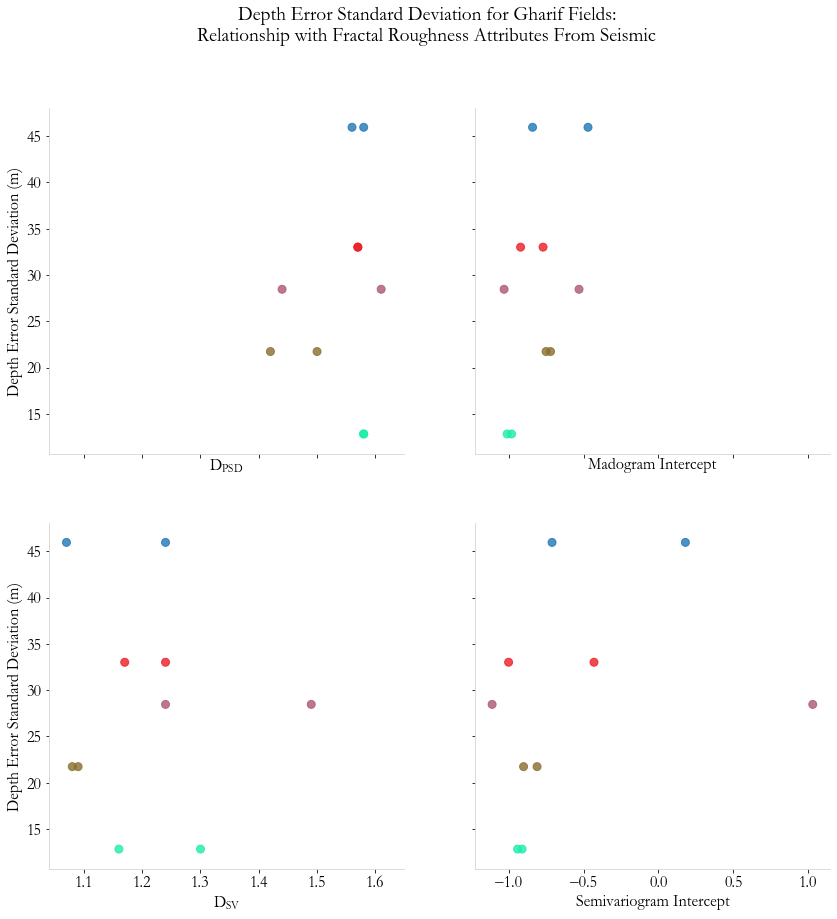

In [10]:
s =64
alpha = 0.8

fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(14,14))  # 2x2 grid

ax[0, 0].scatter(df_input['Dpsd'], df_input['ERROR_STANDARD_DEVIATION_(M)'], c=col_doub, s=s, alpha=alpha)
ax[1, 0].scatter(df_input['Dsv'], df_input['ERROR_STANDARD_DEVIATION_(M)'], c=col_doub, s=s, alpha=alpha)
ax[0, 1].scatter(df_input['M_intercept'], df_input['ERROR_STANDARD_DEVIATION_(M)'], c=col_doub, s=s, alpha=alpha)
ax[1, 1].scatter(df_input['SV_intercept'], df_input['ERROR_STANDARD_DEVIATION_(M)'], c=col_doub, s=s, alpha=alpha)



# x axis labels
ax[0, 0].set_xlabel("$\mathregular{D_{PSD}}$")
ax[1, 0].set_xlabel("$\mathregular{D_{SV}}$")
ax[0, 1].set_xlabel("Madogram Intercept")
ax[1, 1].set_xlabel("Semivariogram Intercept")

# y axis labels
ax[0, 0].set_ylabel('Depth Error Standard Deviation (m)')
ax[1, 0].set_ylabel('Depth Error Standard Deviation (m)')



# cosmetics
## Remove axis lines.
for i in range(2):
    for j in range(2):
        ax[i, j].spines['top'].set_visible(False)
        ax[i, j].spines['right'].set_visible(False)
#         ax[i, j].spines['bottom'].set_visible(False)
#         ax[i, j].spines['left'].set_visible(False)
        
for i in range(2):
    for j in range(2):
        ax[i, j].spines['top'].set_color('lightgrey')
        ax[i, j].spines['right'].set_color('lightgrey')
        ax[i, j].spines['bottom'].set_color('lightgrey')
        ax[i, j].spines['left'].set_color('lightgrey')
        


# plt.tight_layout()
fig.suptitle('Depth Error Standard Deviation for Gharif Fields:\nRelationship with Fractal Roughness Attributes From Seismic')

plt.show()

fig_name=location_out_plots + '_Depth_error_HSGH'  +'.png'
fig.savefig(fig_name,facecolor = 'w',bbox_inches="tight",dpi=1000)

Regressions

In [11]:
# Do a regression for semivariongram intercept
res = stats.linregress(df_input['SV_intercept'], df_input['ERROR_STANDARD_DEVIATION_(M)'])
print(res)

LinregressResult(slope=5.984911986588431, intercept=31.75155071248952, rvalue=0.34348534354025767, pvalue=0.3311754737018493, stderr=5.785531247871878)


In [12]:
res.rvalue ** 2

0.11798218122696884

In [13]:
round(res.slope, 2), round(res.intercept, 2)

(5.98, 31.75)